In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data02.csv', sep = ';', names=['x1', 'x2', 'label'])

In [3]:
df.shape

(100, 3)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df[['x1', 'x2']], df['label'], 
    test_size=0.5, random_state=42, stratify=df['label'])

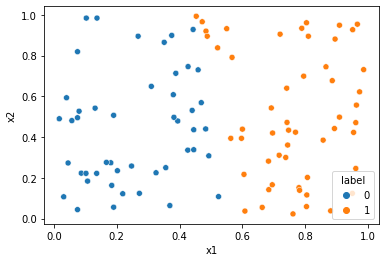

In [13]:
import seaborn as sns
sns.scatterplot(x='x1', y='x2', data=df, hue='label')

In [6]:
class Perceptron(object):

    def __init__(self, n_epochs=20):
        self.errors_ = []
        self.n_epochs = n_epochs
        self.w_ = 0

    def fit(self, X, y):
        self.w_ = np.zeros(X.shape[1])

        for _ in range(self.n_epochs):
            
            error = 0
            
            for xi, target in zip(X, y):
                if self.predict(xi) == 1 and target == 0:
                    error += 1
                    self.w_ -= xi
                elif self.predict(xi) == 0 and target == 1:
                    error += 1
                    self.w_ += xi
   
            self.errors_.append(error)
        return self

    def predict(self, xi):
        return np.where(np.dot(xi, self.w_) > 0.0, 1, 0)

In [7]:
def data_preprocessor(x):
    n = x.shape[0]
    bias = np.ones(shape=(n, 1))
    data = np.concatenate((bias, x), axis=1)

    return data

In [14]:
X_train = data_preprocessor(X_train)
X_test = data_preprocessor(X_test)

In [9]:
ppn = Perceptron()
ppn.fit(X_train, y_train)

In [10]:
# plt.scatter(X_train[:,1],X_train[:,2], c=y_train)

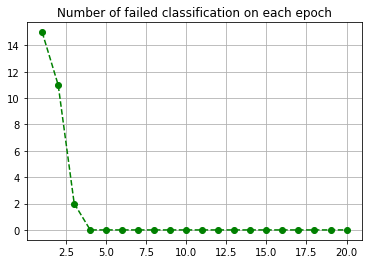

In [11]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, 'g--', marker = 'o' )

plt.title('Number of failed classification on each epoch')
plt.grid()

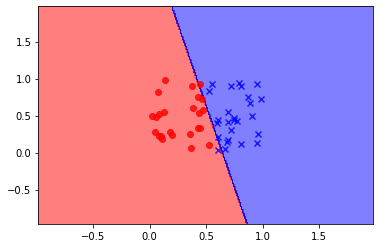

In [12]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X_test[:, 1].min()-1, X_test[:, 1].max()+1
x2_min, x2_max = X_test[:, 2].min()-1, X_test[:, 2].max()+1   

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), 
                       np.arange(x2_min, x2_max, 0.01))


Z = ppn.predict(np.array([np.ones_like(xx1.ravel()), xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z , alpha=0.5, cmap=ListedColormap(['red' , 'blue']))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y_test.values)):
    plt.scatter(X_test[:, 1:][y_test.values == cl, 0], 
                X_test[:, 1:][y_test.values == cl, 1], 
                    alpha = 0.8 , color=ListedColormap(['red' , 'blue'])(idx), 
                        marker = ['o' , 'x'][idx], label = cl)  